#### Step 0: Imports and Reading data

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
plt.style.use('ggplot')

In [63]:
# read data
df_benin=pd.read_csv('../input/benin-malanville.csv')

#### Step 1: Data Understanding
    Dataframe shape, head and tail, dtypes, describe

In [64]:
# check the number of rows and columns on each data soruce
df_benin.shape

(525600, 19)

In [65]:
# show some 100 rows of data from the dataframe
df_benin.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [66]:
# show column from the benin dataframe
df_benin.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [67]:
# explore the data type of every column in the dataset
df_benin.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [68]:
# Calculate the mean, median, standard deviation, and other statistical measures for each numeric column
(df_benin.drop(['Comments'],axis=1)).describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


#### Step 2: Data Preparation
    . Dropping irrelevant columns and rows
    . Identifying duplicated columns
    . Renaming columns
    . Feature Creation
    . change datatype of a column

In [69]:
# remove columns
df_benin=df_benin.drop(['Comments'],axis=1)

In [70]:
# let's change the datatype of the Timestamp column from Object type to datetime 
df_benin['Timestamp']=pd.to_datetime(df_benin['Timestamp'])
df_benin.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

In [71]:
# verify that there are no null values for each columns in the dataset
df_benin.isna().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [72]:
# check if duplicate rows exist in the dataset
df_benin.loc[df_benin.duplicated()]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB


In [73]:
# remove rows with negative value of GHI, DNI, and DHI columns as these columns are expected tobe greater than 0
# 243k rows will be returned
df_benin=df_benin[(df_benin['DHI']>0) & (df_benin['DNI']>0) & (df_benin['DHI']>0)]


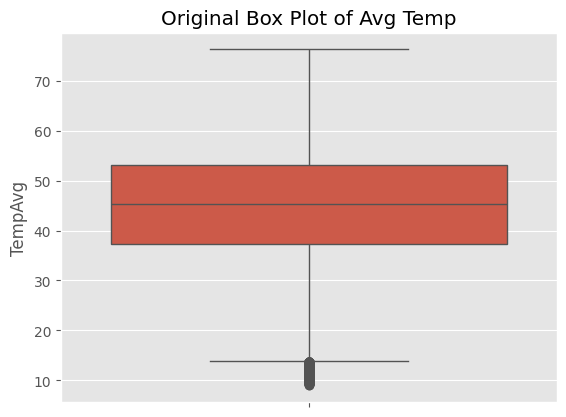

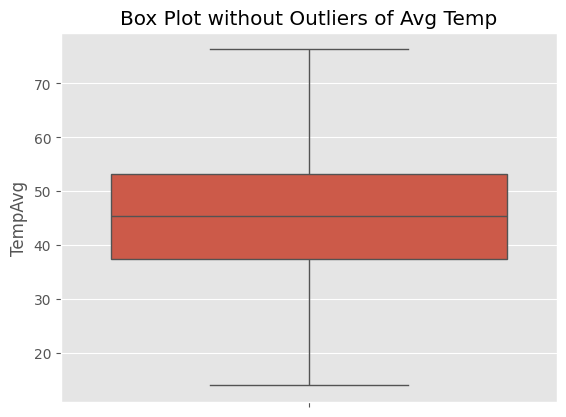

(242444, 19)

In [ ]:
# combine TModA and TModB save the average temprateur as TempAvg
# values less than 14 of the TempAvg column are considered as Outliers 

df_benin['TempAvg'] = (df_benin['TModA'] + df_benin['TModB']) / 2

sns.boxplot(df_benin['TempAvg'])
plt.title('Original Box Plot of Avg Temp')
plt.show()

threshold = 14
df_benin = df_benin[df_benin['TempAvg'] >= threshold]

sns.boxplot(df_benin['TempAvg'])
plt.title(f'Box Plot without Outliers of Avg Temp')
plt.show()

df_benin.shape


<Axes: ylabel='WS'>

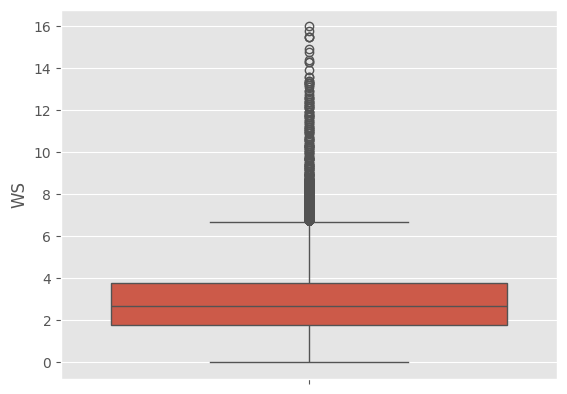

In [78]:
# check outliers in the WS and WSgust columns
sns.boxplot(df_benin['WS'])

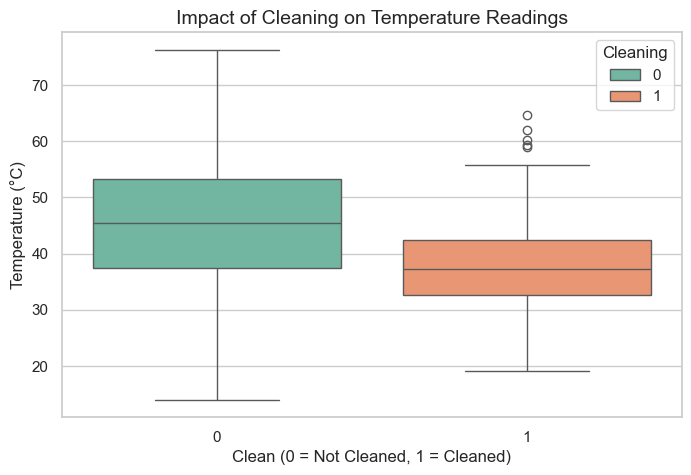

In [84]:
# Show the impact of clean in the temprature 
# Create a boxplot to visualize the impact of cleaning
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cleaning', y='TempAvg', data=df_benin, hue='Cleaning', palette="Set2")

# Customize the plot
plt.title('Impact of Cleaning on Temperature Readings', fontsize=14)
plt.xlabel('Clean (0 = Not Cleaned, 1 = Cleaned)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.show()

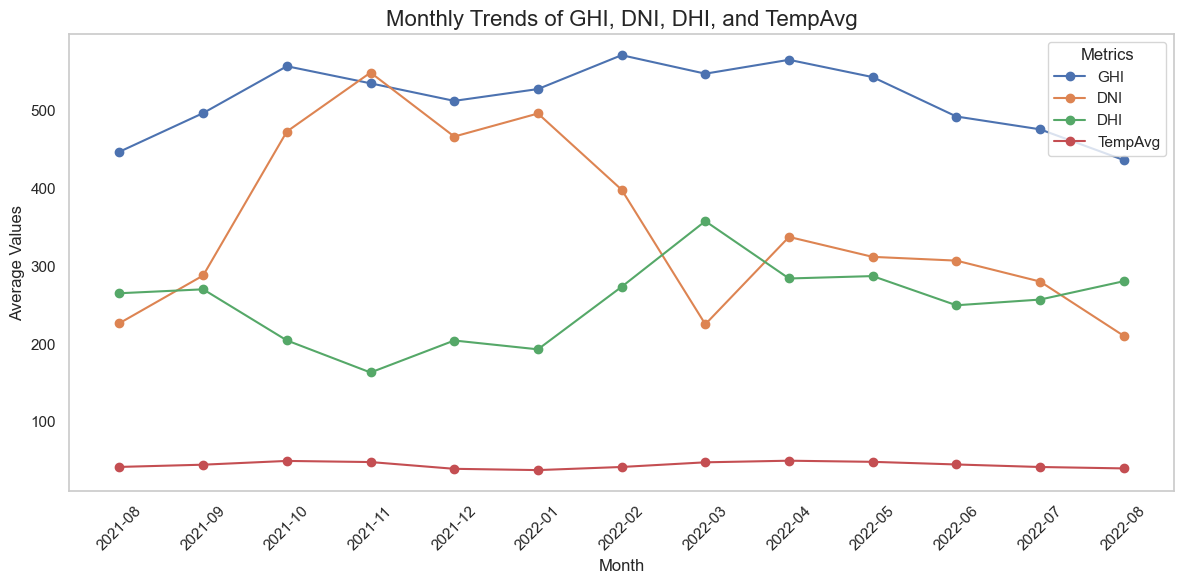

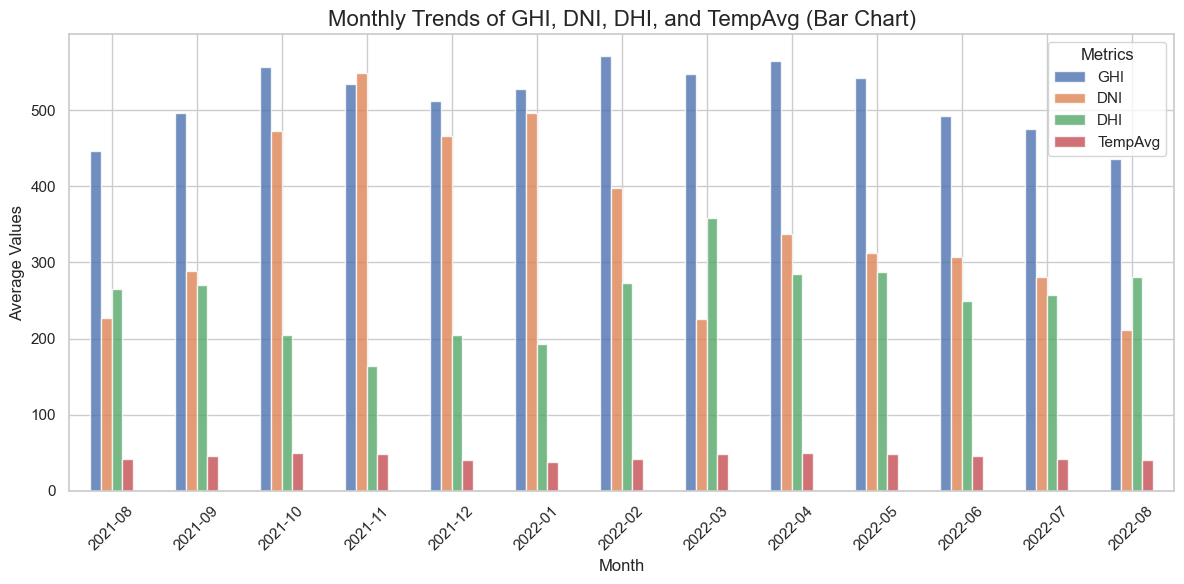

In [86]:
# Time Series Analysis: Plot bar charts or line charts  of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day,
# Convert 'Timestamp' to datetime and create a 'Month' column
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])
df_benin['Month'] = df_benin['Timestamp'].dt.strftime('%Y-%m')  # Format as 'YYYY-MM'

# Aggregate data by month
monthly_avg = df_benin.groupby('Month')[['GHI', 'DNI', 'DHI', 'TempAvg']].mean()

# Plotting line chart for monthly trends
plt.figure(figsize=(12, 6))
for column in ['GHI', 'DNI', 'DHI', 'TempAvg']:
    plt.plot(monthly_avg.index, monthly_avg[column], label=column, marker='o')

# Customize the plot
plt.title('Monthly Trends of GHI, DNI, DHI, and TempAvg', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.legend(title='Metrics')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting bar chart for monthly trends
monthly_avg.plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title('Monthly Trends of GHI, DNI, DHI, and TempAvg (Bar Chart)', fontsize=16)
plt.ylabel('Average Values', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

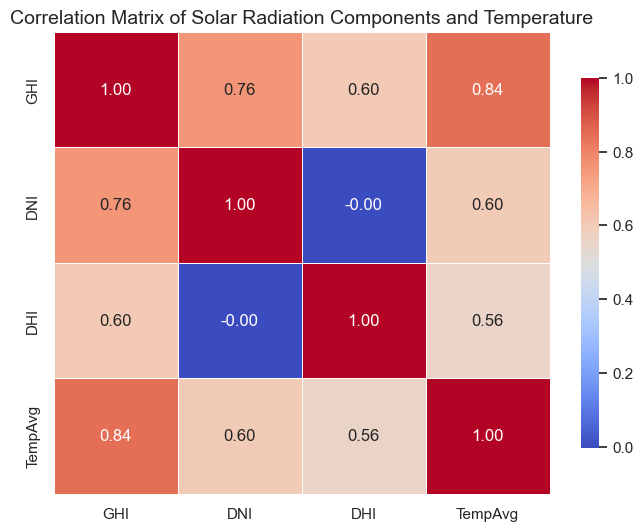

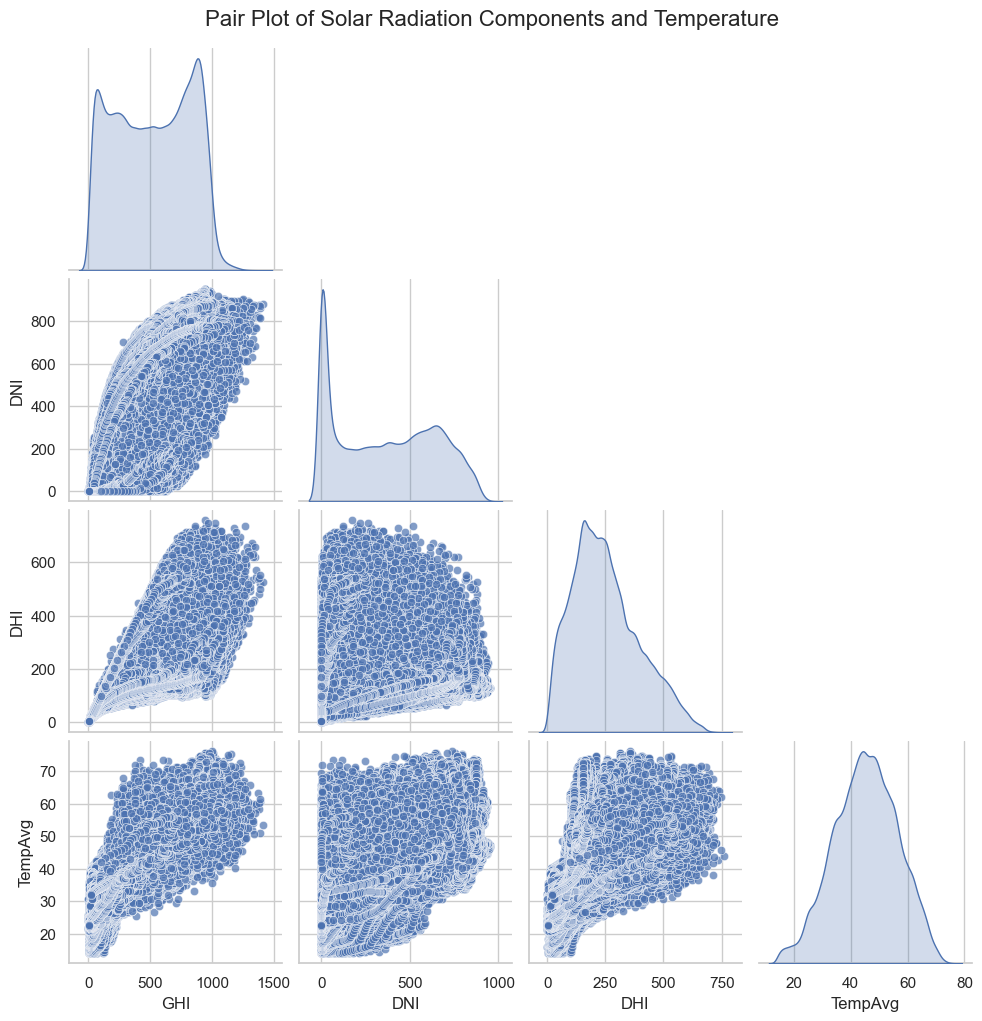

In [ ]:
# Correlation Analysis: Using correlation matrices and pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures
correlation_matrix = df_benin[['GHI', 'DNI', 'DHI', 'TempAvg']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature', fontsize=14)
plt.show()

# Create a pair plot to visualize pairwise relationships
sns.pairplot(df_benin[['GHI', 'DNI', 'DHI', 'TempAvg']], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Solar Radiation Components and Temperature', y=1.02, fontsize=16)
plt.show()

##### Wind Analysis: 
    . using Radial bar plots or Wind roses identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.

C:\Users\mteshale\AppData\Local\Temp\ipykernel_22624\545802078.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_stats = df_benin.groupby('WD_bin').agg({
C:\Users\mteshale\AppData\Local\Temp\ipykernel_22624\545802078.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=get_cmap('viridis')(wind_stats['WS_mean'] / wind_stats['WS_mean'].max()),


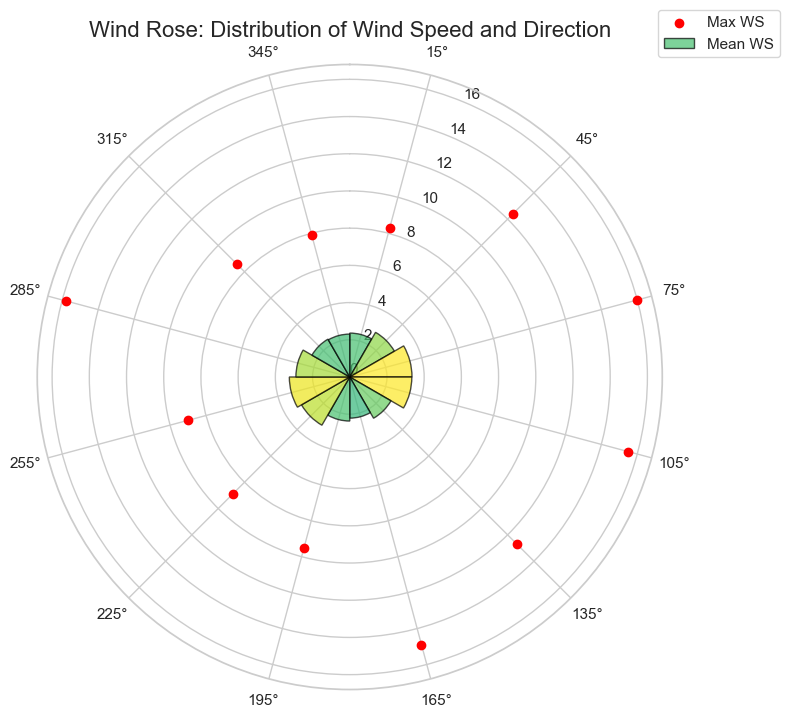

In [91]:
# Wind Analysis: Use radial bar plots or wind roses Identify trends 
# and significant wind events by showing the distribution of wind speed and direction, along 
# with how variable the wind direction tends to be.

# Group data by wind direction bins (e.g., every 30 degrees)

from matplotlib.cm import get_cmap

df_benin['WD_bin'] = pd.cut(df_benin['WD'], bins=np.arange(0, 361, 30), labels=np.arange(15, 361, 30))

# Compute mean wind speed and standard deviation for each wind direction bin
wind_stats = df_benin.groupby('WD_bin').agg({
    'WS': ['mean', 'max'],
    'WDstdev': 'mean'
}).reset_index()
wind_stats.columns = ['Wind_Direction', 'WS_mean', 'WS_max', 'WDstdev_mean']

# Convert wind direction bins to radians for plotting
angles = np.deg2rad(np.arange(15, 361, 30))

# Radial bar plot (Wind Rose)
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot mean wind speed as bars
bars = ax.bar(angles, wind_stats['WS_mean'], width=np.deg2rad(30), 
              color=get_cmap('viridis')(wind_stats['WS_mean'] / wind_stats['WS_mean'].max()), 
              edgecolor='black', alpha=0.7, label='Mean WS')

# Plot max wind speed as markers
ax.scatter(angles, wind_stats['WS_max'], color='red', label='Max WS', zorder=5)

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Set 0 degrees (North) to the top
ax.set_theta_direction(-1)     # Clockwise direction
ax.set_xticks(angles)
ax.set_xticklabels([f"{int(d)}°" for d in np.arange(15, 361, 30)])
ax.set_yticks(range(0, int(wind_stats['WS_max'].max()) + 2, 2))
ax.set_yticklabels(range(0, int(wind_stats['WS_max'].max()) + 2, 2))
ax.set_title("Wind Rose: Distribution of Wind Speed and Direction", fontsize=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


##### Temperature Analysis:
    . Examine how relative humidity (RH) might influence temperature readings and solar radiation.

Correlation Matrix:
             RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.485619 -0.290294 -0.335261 -0.111494
Tamb -0.485619  1.000000  0.394623  0.268500  0.271619
GHI  -0.290294  0.394623  1.000000  0.759390  0.601521
DNI  -0.335261  0.268500  0.759390  1.000000 -0.002691
DHI  -0.111494  0.271619  0.601521 -0.002691  1.000000


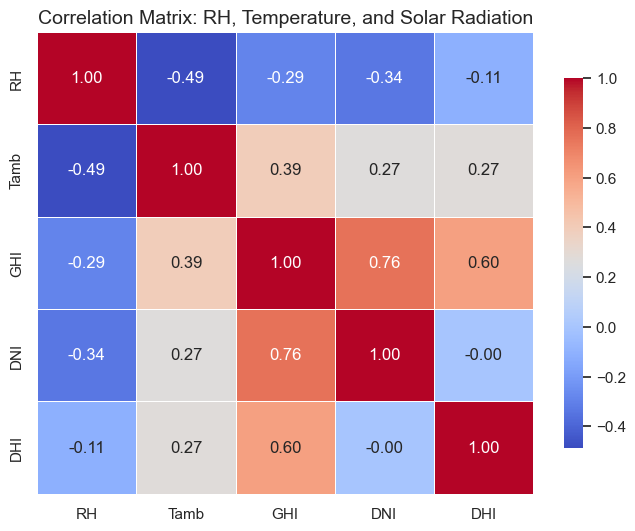

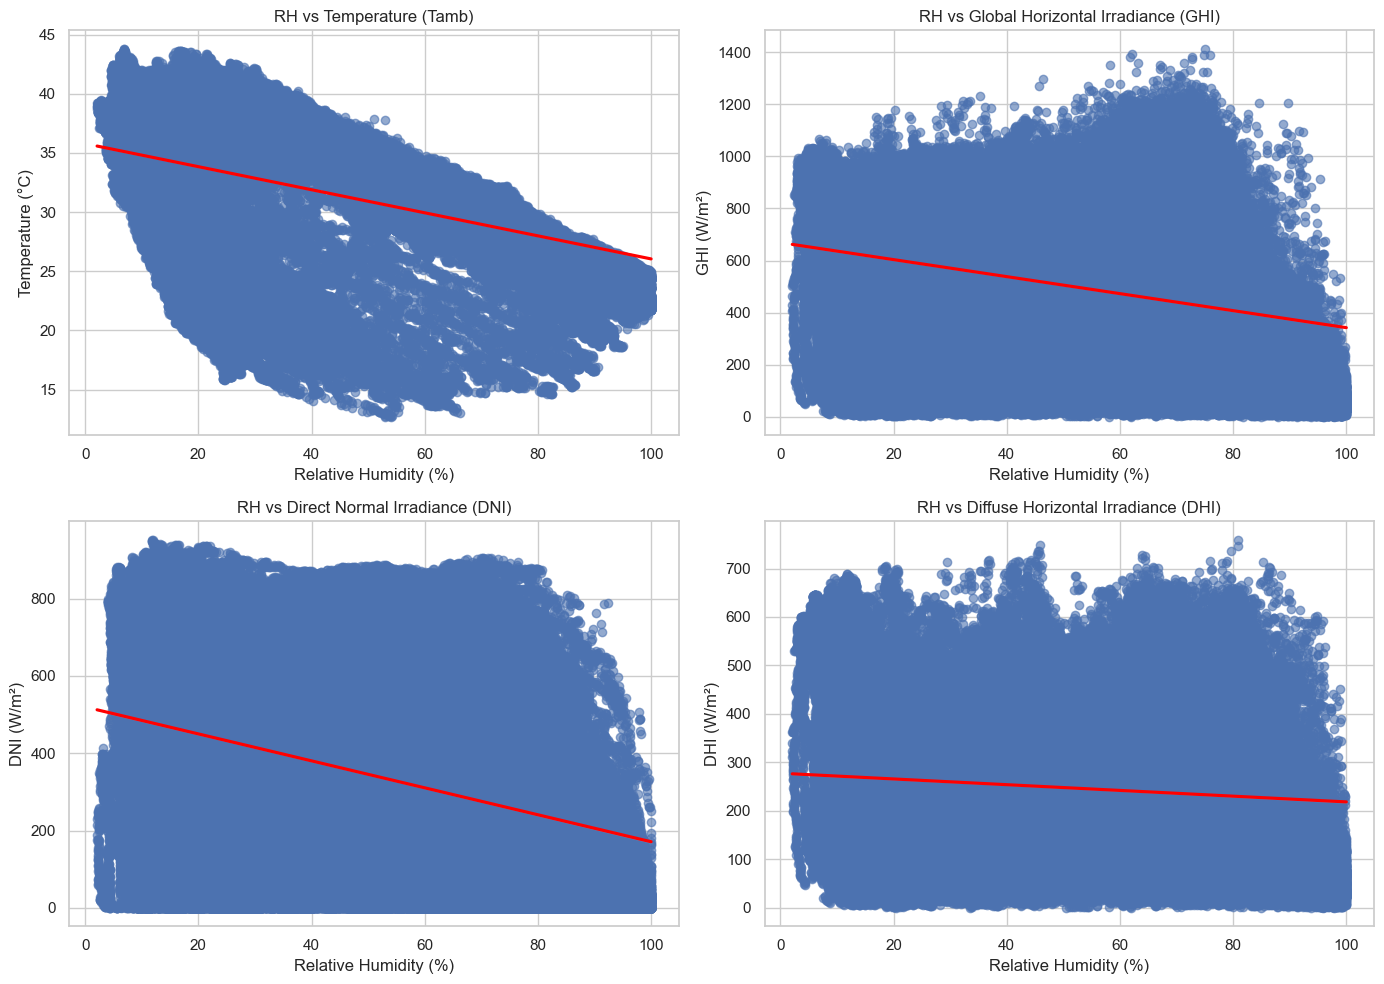

In [90]:
# Correlation matrix
correlation_matrix = df_benin[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
    cbar_kws={"shrink": 0.8}, linewidths=0.5
)
plt.title('Correlation Matrix: RH, Temperature, and Solar Radiation', fontsize=14)
plt.show()

# Scatter plots with regression lines
plt.figure(figsize=(14, 10))

# RH vs Tamb
plt.subplot(2, 2, 1)
sns.regplot(x='RH', y='Tamb', data=df_benin, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('RH vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# RH vs GHI
plt.subplot(2, 2, 2)
sns.regplot(x='RH', y='GHI', data=df_benin, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

# RH vs DNI
plt.subplot(2, 2, 3)
sns.regplot(x='RH', y='DNI', data=df_benin, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('RH vs Direct Normal Irradiance (DNI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')

# RH vs DHI
plt.subplot(2, 2, 4)
sns.regplot(x='RH', y='DHI', data=df_benin, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('RH vs Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

##### Histograms: 
    Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

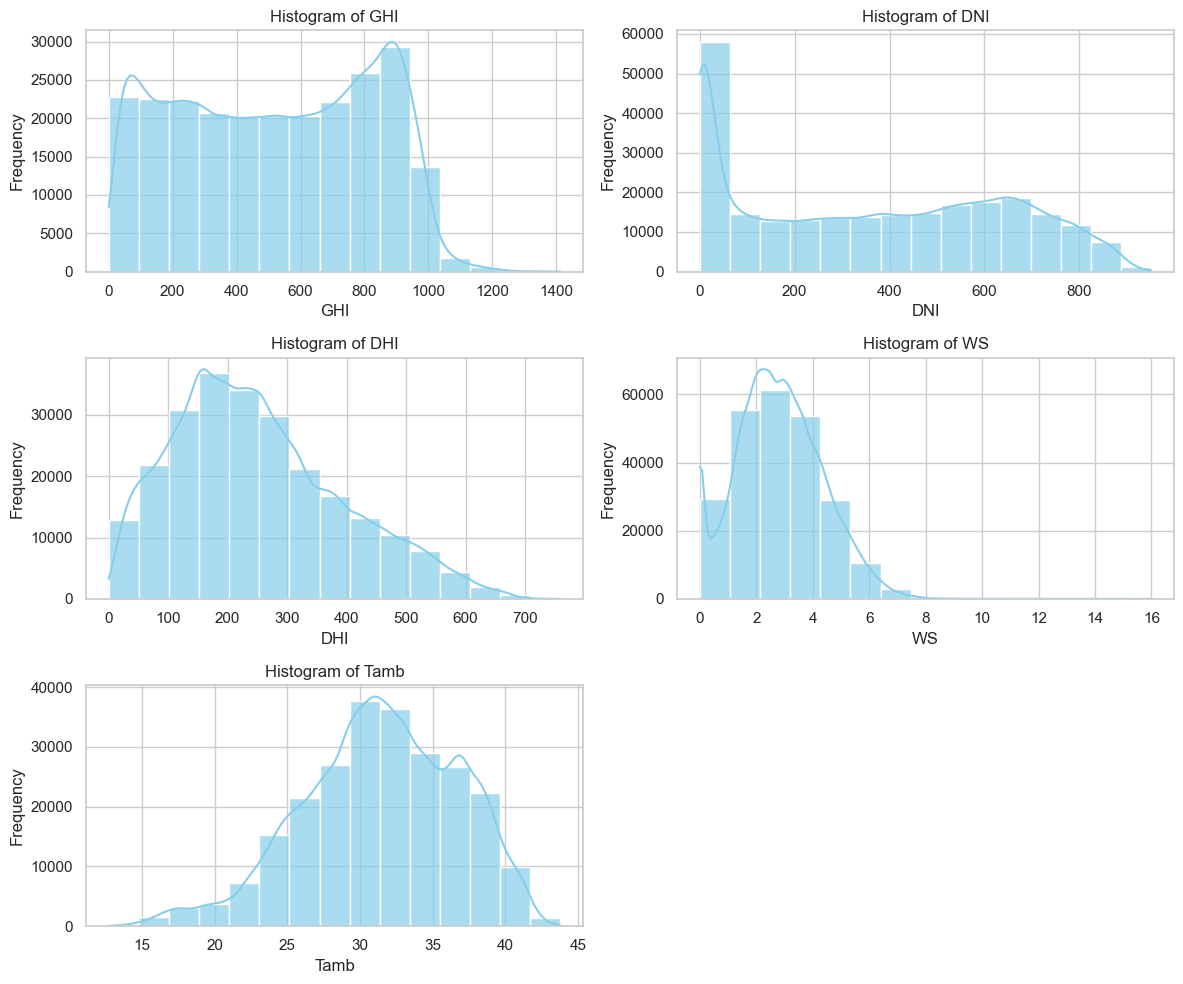

In [92]:
# Plot histograms for each variable
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Arrange subplots in a grid
    sns.histplot(df_benin[var], kde=True, bins=15, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Calculate Z-scores to flag data points that are significantly different from the mean

In [ ]:
# Calculate Z-scores for each column
from scipy.stats import zscore

z_scores = df_benin.apply(zscore)

# Set a threshold for identifying outliers
threshold = 3

# Flag outliers
outliers = (np.abs(z_scores) > threshold)
df_benin['Outlier'] = outliers.any(axis=1)  # Mark rows with any outliers across all columns

# Display the DataFrame with flagged outliers
print("DataFrame with Outliers Flagged:")
print(df_benin.head())

# Separate the outliers for further analysis
outlier_data = df[outliers.any(axis=1)]
print("\nOutliers Detected:")
print(outlier_data)

# Visualize Z-scores for one column (e.g., GHI)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(z_scores['GHI'])), z_scores['GHI'], alpha=0.7, label='Z-scores (GHI)', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (+3)')
plt.axhline(y=-threshold, color='red', linestyle='--', label='Threshold (-3)')
plt.title('Z-scores for GHI')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.legend()
plt.show()